# Restaurant Tipping DataSet

## Agenda:

### 1. Seaborn barplot
**seaborn.barplot**
https://seaborn.pydata.org/generated/seaborn.barplot.html  
Plotting with categorical data: https://seaborn.pydata.org/tutorial/categorical.html

### 2. pandas Density (KDE) plot
**pandas.DataFrame.plot.density**
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.density.html

### 3.  Seaborn displot (formerly distplot)
**seaborn.displot** https://seaborn.pydata.org/generated/seaborn.displot.html  
Visualizaing distributions of data: https://seaborn.pydata.org/tutorial/distributions.html

### 4. Seaborn catplot (formerly factorplot)
**seaborn.catplot** https://seaborn.pydata.org/generated/seaborn.catplot.html  
Plotting with categorical data: https://seaborn.pydata.org/tutorial/categorical.html


### 5. Seaborn boxplot
**seaborn.boxplot**
https://seaborn.pydata.org/generated/seaborn.boxplot.html  
Boxplot is a categorical distribution plot.  Plotting with categorical data: https://seaborn.pydata.org/tutorial/categorical.html


In [9]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
plt.rc('figure', figsize=(10, 6))
%matplotlib inline

In [10]:
tips = pd.read_csv('data/tips.csv')
tips.head(5)

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


## Barplot

### Tipping percentage by day with *seaborn*
*tip_pct* is the new column

In [11]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


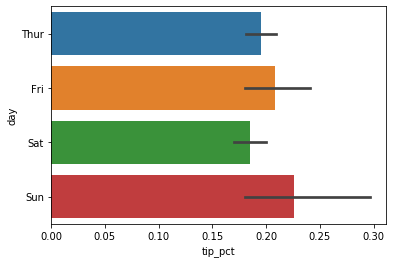

In [12]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h', order=['Thur', 'Fri', 'Sat', 'Sun'])
# tip_pct and day are both columns in a DataFrame

Because there are multiple observations for each value in the day, the bars are the **average** value of *tip_pct*.  

### The black lines drawn on the bars represent the 95 confidence interval.
In other words, you can be 95% certain that the actual percent of all tips will be between the left and right edges of the bars.

How are they calculated?  https://datascience.stackexchange.com/questions/8645/python-seaborn-how-are-error-bars-computed-in-barplots

### *seaborn.barplot()* hue 

hue option enables use to split by an additional categorical value.

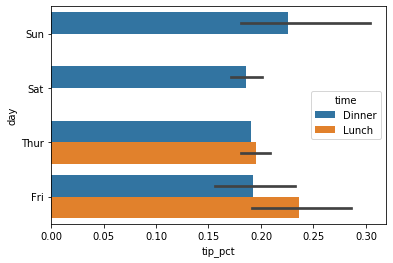

In [13]:
# sns.set(style="whitegrid")
# y - Tableau Rows shelf
# x - Tableau Columns shelf

sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')


More on **seaborn** barplots: https://seaborn.pydata.org/generated/seaborn.barplot.html

### Histograms and Density Plots

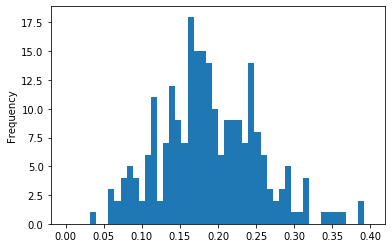

In [14]:
tips['tip_pct'].plot.hist(bins=50, range=(0, .40))

#### A density plot (KDE plot)
- is an estimate of a continuous probability distribution that might have generated the observed data.  
- a smoothed, continuous version of a histogram estimated from the data. 

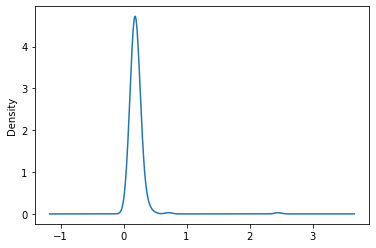

In [15]:
tips['tip_pct'].plot.density()

#### distplot
combines together a histogram with the kde plot.

/Users/anna/anaconda/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


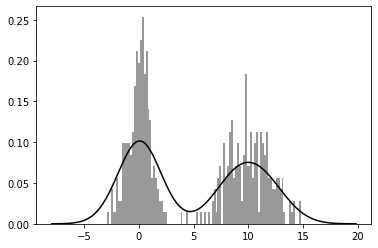

In [16]:
#deprecated.  
# loc   : 'center' of the distribution; 
# scale : standard deviation 
comp1 = np.random.normal(loc=0,  scale=1, size=200)
comp2 = np.random.normal(loc=10, scale=2, size=200)

values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

### Factorplot has been renamed to Catplot (Categorical Data)
  
  
The definitions of data subsets are adjusted by the followig parameters:
***hue***, ***col*** and ***row***.

In [17]:
tips[tips.tip_pct > 1]

,total_bill,tip,smoker,day,time,size,tip_pct
172,7.25,5.15,Yes,Sun,Dinner,2,2.452381


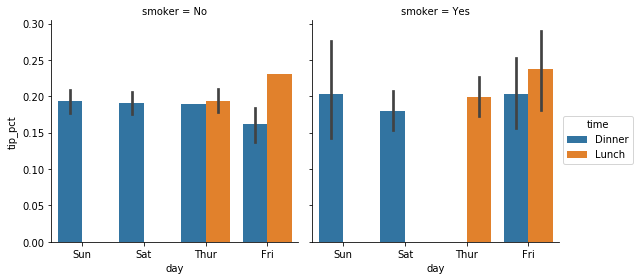

In [18]:
sns.factorplot(x='day', y='tip_pct', 
               hue='time', 
               col='smoker',
               kind='bar', 
               data=tips[tips.tip_pct < 1])

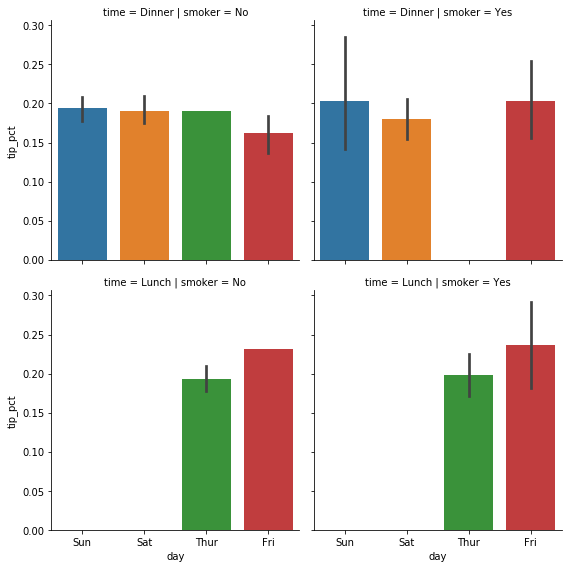

In [19]:
sns.factorplot(x='day', y='tip_pct', 
               row='time', col='smoker',
               kind='bar', 
               data=tips[tips.tip_pct < 1])

#### Box Plot
A box plot is a graphical rendition of statistical data based on the minimum, first quartile, median, third quartile, and maximum.  
Because of the extending lines, this type of graph is sometimes called a box-and-whisker plot.
https://whatis.techtarget.com/definition/box-plot


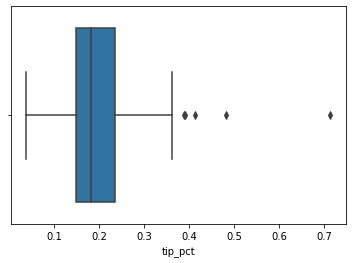

In [20]:
sns.boxplot(x=tips.tip_pct[tips.tip_pct < 1])

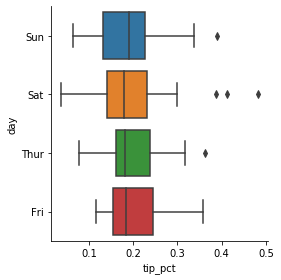

In [21]:
sns.factorplot(x='tip_pct', y='day', 
               kind='box',
               data=tips[tips.tip_pct < 0.5])